In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("D:\Trim 4\Predictive Analytics\ITC_data.csv")

In [3]:
df.head()

,DATE,OPEN
0,2003-01-01,14.83
1,2003-02-01,14.29
2,2003-03-01,14.56
3,2003-04-01,13.98
4,2003-05-01,15.17


In [4]:
df.tail()

,DATE,OPEN
236,2022-09-01,319.50
237,2022-10-01,332.90
238,2022-11-01,349.25
239,2022-12-01,341.70
240,2023-01-01,330.90


In [5]:
## Cleaning up the data
df.columns=["Month","StockPrice"]
df.head()

,Month,StockPrice
0,2003-01-01,14.83
1,2003-02-01,14.29
2,2003-03-01,14.56
3,2003-04-01,13.98
4,2003-05-01,15.17


In [6]:
df.tail()

,Month,StockPrice
236,2022-09-01,319.50
237,2022-10-01,332.90
238,2022-11-01,349.25
239,2022-12-01,341.70
240,2023-01-01,330.90


In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.head()

,StockPrice
Month,
2003-01-01,14.83
2003-02-01,14.29
2003-03-01,14.56
2003-04-01,13.98
2003-05-01,15.17


In [9]:
df.tail()

,StockPrice
Month,
2022-09-01,319.50
2022-10-01,332.90
2022-11-01,349.25
2022-12-01,341.70
2023-01-01,330.90


In [10]:
df.describe()

,StockPrice
count,241.000000
mean,157.530456
std,95.419588
min,13.980000
25%,61.990000
50%,180.980000
75%,236.900000
max,349.250000


<AxesSubplot:xlabel='Month'>

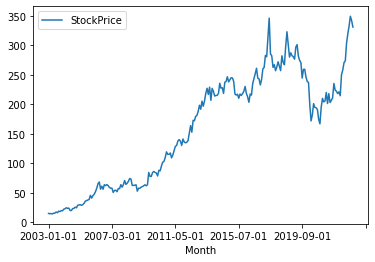

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['StockPrice'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(stockprice):
    result=adfuller(stockprice)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['StockPrice'])

ADF Test Statistic : -0.6143799177213126
p-value : 0.8676995367315576
#Lags Used : 12
Number of Observations Used : 228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
#Differencing
df['Price First Difference'] = df['StockPrice'] - df['StockPrice'].shift(1)

In [17]:
df['StockPrice'].shift(1)

Month
2003-01-01       NaN
2003-02-01     14.83
2003-03-01     14.29
2003-04-01     14.56
2003-05-01     13.98
               ...  
2022-09-01    304.00
2022-10-01    319.50
2022-11-01    332.90
2022-12-01    349.25
2023-01-01    341.70
Name: StockPrice, Length: 241, dtype: float64

In [18]:
df['Seasonal First Difference']=df['StockPrice']-df['StockPrice'].shift(24)

In [19]:
df.head(14)

,StockPrice,Price First Difference,Seasonal First Difference
Month,,,
2003-01-01,14.83,NaN,NaN
2003-02-01,14.29,-0.54,NaN
2003-03-01,14.56,0.27,NaN
2003-04-01,13.98,-0.58,NaN
2003-05-01,15.17,1.19,NaN
2003-06-01,15.37,0.20,NaN
2003-07-01,17.09,1.72,NaN
2003-08-01,16.03,-1.06,NaN
2003-09-01,18.66,2.63,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9620593137360602
p-value : 0.0016227427712002544
#Lags Used : 15
Number of Observations Used : 201
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

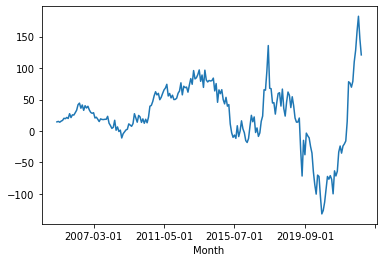

In [21]:
df['Seasonal First Difference'].plot()

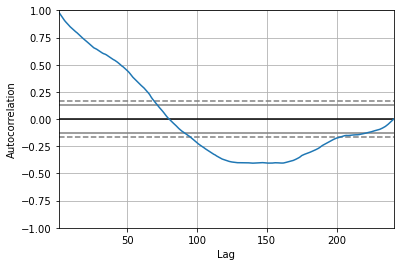

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['StockPrice'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


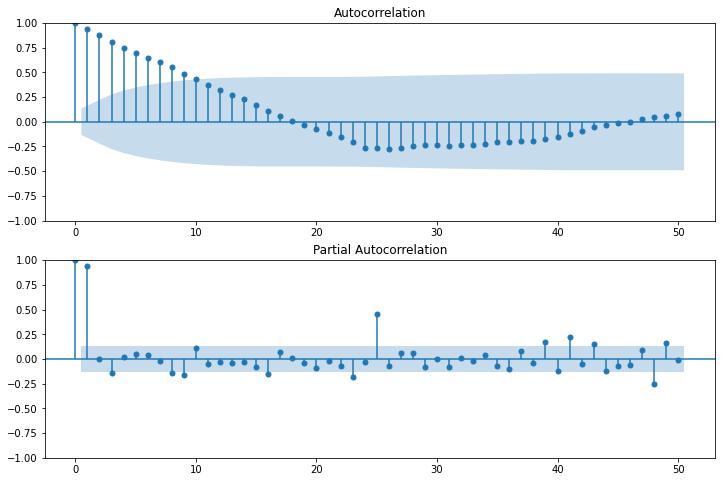

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[25:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[25:],lags=50,ax=ax2)

In [25]:
# For non-seasonal data
#p=2, d=2, q=19 
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(df['StockPrice'],order=(2,1,19))
model_fit=model.fit()

C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             StockPrice   No. Observations:                  241
Model:                ARIMA(2, 1, 19)   Log Likelihood                -901.548
Date:                Fri, 01 Sep 2023   AIC                           1847.097
Time:                        00:30:09   BIC                           1923.671
Sample:                    01-01-2003   HQIC                          1877.951
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3441      0.447     -0.770      0.441      -1.220       0.532
ar.L2         -0.6407      0.431     -1.487      0.137      -1.485       0.204
ma.L1          0.3563      0.447      0.798      0.425      -0.519       1.232
ma.L2          0.6679      0.429      1.559      0.119      -0.172       1.508
ma.L3          0.0330      0.071      0.468      0.640      -0.105       0.171
ma.L4          0.0574      0.081      0.708      0.479      -0.101       0.216
ma.L5         -0.0369      0.088     -0.418      0.676      -0.210       0.136
ma.L6          0.0092      0.089      0.103      0.918      -0.165       0.183
ma.L7          0.0246      0.103      0.240      0.811      -0.177       0.226
ma.L8          0.1262      0.096      1.318      0.188      -0.062       0.314
ma.L9         -0.0839      0.099     -0.848      0.396      -0.278       0.110
ma.L10         0.3542      0.131      2.713      0.007       0.098       0.610
ma.L11        -0.0480      0.164     -0.293      0.770      -0.369       0.273
ma.L12         0.1098      0.174      0.631      0.528      -0.231       0.450
ma.L13        -0.1866      0.098     -1.905      0.057      -0.379       0.005
ma.L14         0.0740      0.101      0.735      0.462      -0.123       0.271
ma.L15        -0.0380      0.116     -0.328      0.743      -0.264       0.189
ma.L16         0.1736      0.103      1.689      0.091      -0.028       0.375
ma.L17         0.0591      0.097      0.607      0.544      -0.132       0.250
ma.L18         0.0134      0.085      0.158      0.874      -0.153       0.179
ma.L19        -0.0279      0.082     -0.340      0.734      -0.189       0.133
sigma2       102.0008      6.667     15.300      0.000      88.935     115.067
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               240.83
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              10.27   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

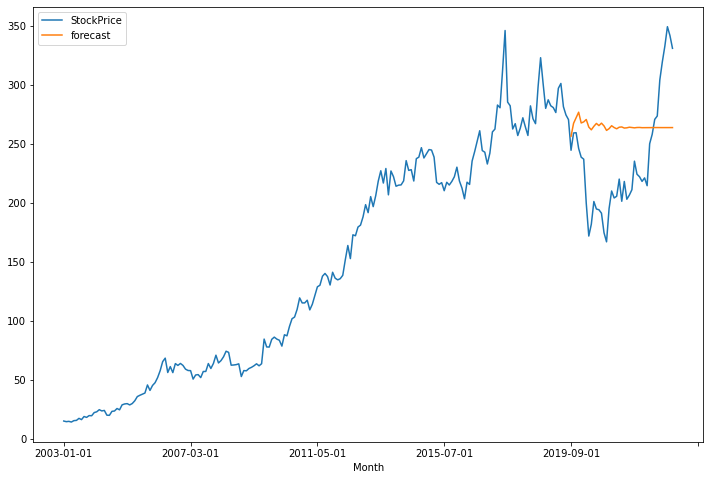

In [28]:
df['forecast']=model_fit.predict(start=200,end=240,dynamic=True)
df[['StockPrice','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(df['StockPrice'],order=(2, 1, 19),seasonal_order=(1,1,1,24))
results=model.fit()

C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Roshi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

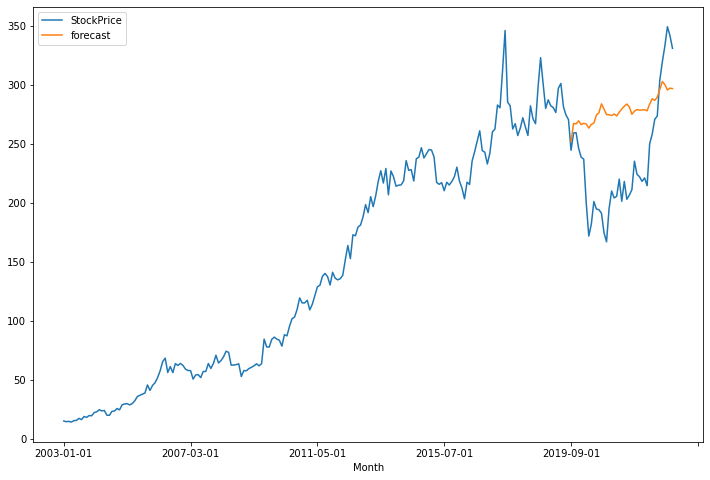

In [32]:
df['forecast']=results.predict(start=200,end=240,dynamic=True)
df[['StockPrice','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

TypeError: can only concatenate str (not "DateOffset") to str

In [34]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Convert index to datetime if it's in string format
df.index = pd.to_datetime(df.index)

# Calculate future dates using DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 25)]

# Convert future_dates back to string format if needed
future_dates_str = [date.strftime('%Y-%m-%d') for date in future_dates]

# Print the future dates
print(future_dates_str)

['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01']


In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,StockPrice,Price First Difference,Seasonal First Difference,forecast
2024-09-01,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

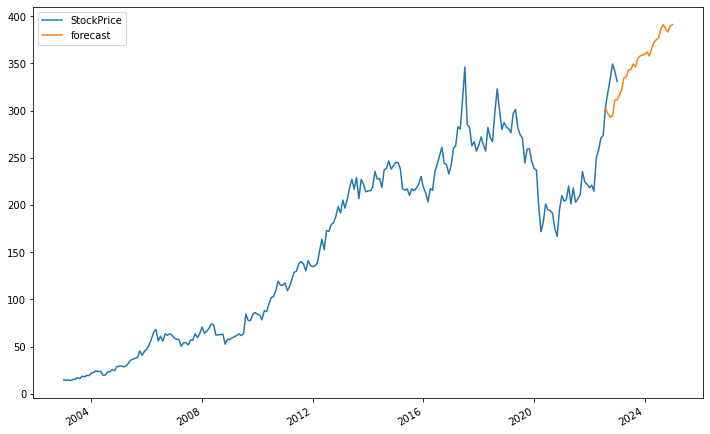

In [43]:
future_df['forecast'] = results.predict(start = 235, end = 290, dynamic= True)  
future_df[['StockPrice', 'forecast']].plot(figsize=(12, 8)) 